# Cleaning data in Python 


* NaN : not a number -- special floating-point value
* Working with duplicates and missing values
    * isnull()
    * notnull()
    * dropna()
    * fillna()
    * replace()
* Which values should be replaced with missing values based on data identifying and eliminating outliers

* Dropping duplicate data



#### Identifying and Eliminating Outliers
* Outliers are observations that are significantly different from other data points
* Outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy.
* Need to use the mathematical formula and retrieve the outlier data.

     **interquartile range(IQR) = Q3(quantile(0.75)) − Q1(quantile(0.25))**
     ![boxplot](box.png)

In [1]:
import pandas as pd
emp = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/DataAnalysisBatch-6/main/08-10-2020(Day-4)/Datasets/employe.csv")
emp.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [2]:
emp.shape

(1000, 8)

In [4]:
emp.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [5]:
emp.notnull().sum()

First Name            933
Gender                855
Start Date           1000
Last Login Time      1000
Salary               1000
Bonus %              1000
Senior Management     933
Team                  957
dtype: int64

## Droping

In [6]:
emp.dropna()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [7]:
emp.dropna().shape

(764, 8)

In [8]:
emp.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [11]:
emp["Gender"].isnull().sum()

145

In [13]:
pd.isnull(emp["Gender"])

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998    False
999    False
Name: Gender, Length: 1000, dtype: bool

## Filling missing values with meaningful data
* Constant
* Mode
* mean
* Median 

In [15]:
emp["Gender"].fillna("No Gender") # replacing constant value inplace of NAN

0           Male
1           Male
2         Female
3           Male
4           Male
         ...    
995    No Gender
996         Male
997         Male
998         Male
999         Male
Name: Gender, Length: 1000, dtype: object

In [17]:
emp["Gender"].fillna(method = "pad")  # filling values with previous once

0        Male
1        Male
2      Female
3        Male
4        Male
        ...  
995      Male
996      Male
997      Male
998      Male
999      Male
Name: Gender, Length: 1000, dtype: object

In [18]:
emp["Gender"].fillna(method = "bfill") # backword value 

0        Male
1        Male
2      Female
3        Male
4        Male
        ...  
995      Male
996      Male
997      Male
998      Male
999      Male
Name: Gender, Length: 1000, dtype: object

In [19]:
emp["Gender"].fillna(0)

0        Male
1        Male
2      Female
3        Male
4        Male
        ...  
995         0
996      Male
997      Male
998      Male
999      Male
Name: Gender, Length: 1000, dtype: object

In [20]:
emp.replace(to_replace = "Male", value = 0) # replace any value to the given value

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,0,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,0,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,0,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,0,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,0,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,0,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,0,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [21]:
emp

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


# Drop

In [23]:
import numpy as np
di  = { "First" : [100,np.nan,67,87,69,4],
       "second" : [90,89,np.nan,78,78,56],
       "third" : [23,46,67,789,9,np.nan]
    
}
df = pd.DataFrame(di)
df

,First,second,third
0,100.0,90.0,23.0
1,NaN,89.0,46.0
2,67.0,NaN,67.0
3,87.0,78.0,789.0
4,69.0,78.0,9.0
5,4.0,56.0,NaN


In [24]:
df.dropna() # it returns entries having not null values 

,First,second,third
0,100.0,90.0,23.0
3,87.0,78.0,789.0
4,69.0,78.0,9.0


In [26]:
df.dropna(axis = 0)

,First,second,third
0,100.0,90.0,23.0
3,87.0,78.0,789.0
4,69.0,78.0,9.0


In [27]:
df.dropna(axis = 1)

""
0
1
2
3
4
5


In [29]:
df.isna().sum()

First     1
second    1
third     1
dtype: int64

## Dropping Duplicate values

In [41]:
import numpy as np
di  = { "First" : [100,89,np.nan,67,87,89],
       "second" : [90,80,np.nan,78,78,78],
       "third" : [23,46,67,789,9,np.nan]
    
}
df = pd.DataFrame(di)
df

,First,second,third
0,100.0,90.0,23.0
1,89.0,80.0,46.0
2,89.0,80.0,46.0
3,NaN,NaN,67.0
4,67.0,78.0,789.0
5,87.0,78.0,9.0
6,89.0,78.0,NaN


In [38]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [39]:
df.shape

(6, 3)

In [40]:
df.drop_duplicates() # 

,First,second,third
0,100.0,90.0,23.0
1,89.0,80.0,46.0
2,NaN,NaN,67.0
3,67.0,78.0,789.0
4,87.0,78.0,9.0
5,89.0,78.0,NaN


In [42]:
import numpy as np
di  = { "First" : [100,89,89,np.nan,67,87,89],
       "second" : [90,80,80,np.nan,78,78,78],
       "third" : [23,46,46,67,789,9,np.nan]
    
}
df = pd.DataFrame(di)
df

,First,second,third
0,100.0,90.0,23.0
1,89.0,80.0,46.0
2,89.0,80.0,46.0
3,NaN,NaN,67.0
4,67.0,78.0,789.0
5,87.0,78.0,9.0
6,89.0,78.0,NaN


In [43]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
5    False
6    False
dtype: bool

In [44]:
df.drop_duplicates()

,First,second,third
0,100.0,90.0,23.0
1,89.0,80.0,46.0
3,NaN,NaN,67.0
4,67.0,78.0,789.0
5,87.0,78.0,9.0
6,89.0,78.0,NaN


In [ ]:
1 -- lavanya@gmail.com lavanya 72
2 -- lavanya@gmail.com mercy 27

2 different

In [45]:
df.drop_duplicates(subset = "second")

,First,second,third
0,100.0,90.0,23.0
1,89.0,80.0,46.0
3,NaN,NaN,67.0
4,67.0,78.0,789.0


In [47]:
df.drop_duplicates(subset = ["second","third"])

,First,second,third
0,100.0,90.0,23.0
1,89.0,80.0,46.0
3,NaN,NaN,67.0
4,67.0,78.0,789.0
5,87.0,78.0,9.0
6,89.0,78.0,NaN


In [ ]:
1lakh ----  

10k -- 

In [ ]:
600 -- 601 
10/10  --  10.1 --- outlier 

1000 record --  2020 student data 
2 records -- 2002 student data 

## Identifying and Eliminating Outliers


In [49]:
adv = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/DataAnalysisBatch-6/main/08-10-2020(Day-4)/Datasets/Advertising.csv")
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [50]:
import matplotlib.pyplot as plt

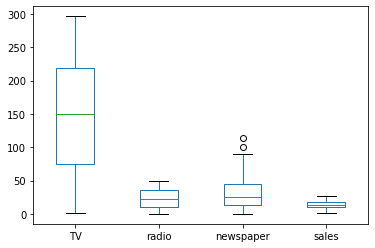

In [57]:
adv.plot(kind = "box")
plt.show()

In [59]:
# interquartile range(IQR) = Q3(quantile(0.75)) − Q1(quantile(0.25))
Q3 = adv.quantile(0.75)
Q1 = adv.quantile(0.25)
IQR = Q3 - Q1
IQR

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64

In [63]:
filter_data = adv[((adv < (Q1-1.5*IQR)) | (adv > (Q3+1.5*IQR))).any(axis = 1)]
filter_data

,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [64]:
# interquartile range(IQR) = Q3(quantile(0.75)) − Q1(quantile(0.25))
Q3 = adv.quantile(0.75)
Q1 = adv.quantile(0.25)
IQR = Q3 - Q1
IQR
filter_data = adv[~((adv < (Q1-1.5*IQR)) | (adv > (Q3+1.5*IQR))).any(axis = 1)]
filter_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


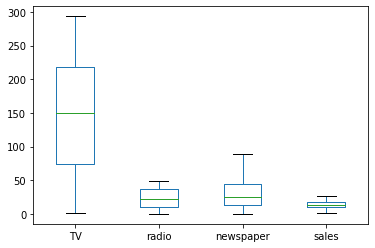

In [66]:
filter_data.plot(kind = "box")
plt.show()

# Data Preprocessing with scikit-learn

# Preprocessing Techniques
* Data Preprocessing is a technique that is used to convert the raw data into a clean data set

### Data preprocessing steps

* loading data (reading files)
* exploring data (summarizing,statastics..ect)
* cleaning data  ( handling missing data)
* Transforming data ( Scaling, feature engineering etc)

    * will learn data preprocessing techniques with scikit-learn, one of the most popular frameworks used for industry data science
    * The scikit-learn library includes tools for data preprocessing and data mining. It is imported in Python via the statement import sklearn.

![ddd.PNG](ddd.PNG)

### Data Imputation 
* if the dataset is missing too many values, we just don't use it
*  if only a few of the values are missing, we can perform data imputation to substitute the missing data with some other value(s).
* There are many different methods for data imputation
    * Using the mean value
    * Using the median value
    * Using the most frequent value
    * Filling in missing values with a constant
    
**ex: Sem exams and electric bills **


## Feature Scaling

### 1.Standardizing Data

**ex : distance  (cm,m,km,miles)**                      

* Data scientists will convert the data into a standard format to make it easier to understand.
* The standard format refers to data that has 0 mean and unit variance (i.e. standard deviation = 1), and the process of    converting data into this format is called data standardization.
* improve the performance of models
* it rescales the data to have mean = 0 and varience(statistical measure that provides indicator of data's dispresion) = 1

* Standardization rescales data so that it has a mean of 0 and a standard deviation of 1.
* The formula for this is:  (𝑥 − 𝜇)/𝜎

    * We subtract the mean (𝜇) from each value (x) and then divide by the standard deviation (𝜎)
    
![stddata.PNG](stddata.PNG)

![std.PNG](std.PNG)

    
### 2. Data Range

* Scale data by compressing it into a fixed range
* One of the biggest use cases for this is compressing data into the range [0, 1]
* MinMaxScaler 
![minmax.PNG](minmax.PNG)

### 3. Normalizing Data

* Want to scale the individual data observations (i.e. rows)
* Used in classification Problems and data mining 
* **ex : columns : salary,ex_yr,position_levels**
* when clustering data we need to apply L2 normalization to each row
* L2 normalization applied to a particular row of a data array 
* L2 norm of a row is just the square root of the sum of squared values for the row
![norm.png](norm.PNG)


### 4. Robust Scaling
* Deal with is outliers (data point that is significantly further away from the other data points)
* Robustly scale the data, i.e. avoid being affected by outliers
* Scaling by using data's median and Interquartile Range (IQR)
* Here mean affected but median remains same
* Subtract the median from each data value then scale to the IQR



In [ ]:
[10kg, 1000tone, 800gms, 70gms]  --- weight 

kg 

10+1000+800+70 ---- 

# Data Imputation

In [67]:
from sklearn.impute import SimpleImputer

In [69]:
di = {
    "a" : pd.Series([12,34,45,np.nan,56],index = [1,2,3,4,5]),
    "b" : pd.Series([90,89,78,89],index = [1,3,4,5]),
    "c" : pd.Series([13,45,35,35],index = [1,2,3,4])
}
df = pd.DataFrame(di)
df

,a,b,c
1,12.0,90.0,13.0
2,34.0,NaN,45.0
3,45.0,89.0,35.0
4,NaN,78.0,35.0
5,56.0,89.0,NaN


In [70]:
si  = SimpleImputer(strategy= "median")
si.fit_transform(df)

array([[12. , 90. , 13. ],
       [34. , 89. , 45. ],
       [45. , 89. , 35. ],
       [39.5, 78. , 35. ],
       [56. , 89. , 35. ]])

In [73]:
df.median()

a    39.5
b    89.0
c    35.0
dtype: float64

In [74]:
si  = SimpleImputer(strategy= "mean")
si.fit_transform(df)

array([[12.  , 90.  , 13.  ],
       [34.  , 86.5 , 45.  ],
       [45.  , 89.  , 35.  ],
       [36.75, 78.  , 35.  ],
       [56.  , 89.  , 32.  ]])

In [75]:
df.mean()

a    36.75
b    86.50
c    32.00
dtype: float64

In [76]:
si  = SimpleImputer(strategy= "most_frequent")
si.fit_transform(df)

array([[12., 90., 13.],
       [34., 89., 45.],
       [45., 89., 35.],
       [12., 78., 35.],
       [56., 89., 35.]])

In [78]:
si  = SimpleImputer(strategy= "constant", fill_value = -1)
si.fit_transform(df)

array([[12., 90., 13.],
       [34., -1., 45.],
       [45., 89., 35.],
       [-1., 78., 35.],
       [56., 89., -1.]])

# Task

* load titanic dataset
* clean data by using simpleimputer

# 1.Standardizing Data

In [79]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


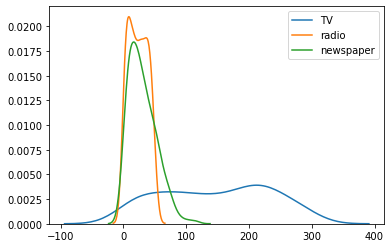

In [81]:
import seaborn as sns
sns.kdeplot(adv["TV"])
sns.kdeplot(adv["radio"])
sns.kdeplot(adv["newspaper"])
plt.show()

In [82]:
adv["TV"][0]

230.1

In [85]:
# std_data = (x-mean(x)) / std(x)
(adv["TV"][0] - adv["TV"].mean()) / adv["TV"].std()

0.9674245973763037

In [86]:
from sklearn.preprocessing import scale

In [87]:
scl = scale(adv)
scl

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00,
        -9.07405869e-01],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00,
         8.60330287e-01],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01,
        -4.27042783e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00,
        -1.77205942e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01,
        -6.57617064e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01,
        -1.04190753e+00],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00,
      

In [89]:
scl_data = pd.DataFrame(scl,columns = adv.columns)
scl_data

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


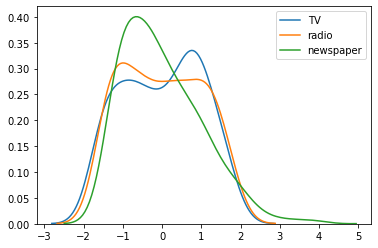

In [90]:
sns.kdeplot(scl_data["TV"])
sns.kdeplot(scl_data["radio"])
sns.kdeplot(scl_data["newspaper"])
plt.show()

In [91]:
adv.mean()

TV           147.0425
radio         23.2640
newspaper     30.5540
sales         14.0225
dtype: float64

In [92]:
adv.std()

TV           85.854236
radio        14.846809
newspaper    21.778621
sales         5.217457
dtype: float64

In [94]:
scl_data.mean().round(3)

TV           0.0
radio       -0.0
newspaper    0.0
sales       -0.0
dtype: float64

In [95]:
scl_data.std().round(3)

TV           1.003
radio        1.003
newspaper    1.003
sales        1.003
dtype: float64

# Data range

In [96]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
mnscl = MinMaxScaler()

In [101]:
mnscale  = mnscl.fit_transform(adv)

In [102]:
mnscale.min()

0.0

In [103]:
mnscale.max()

1.0

In [104]:
adv.min()

TV           0.7
radio        0.0
newspaper    0.3
sales        1.6
dtype: float64

In [105]:
adv.max()

TV           296.4
radio         49.6
newspaper    114.0
sales         27.0
dtype: float64

In [106]:
mnscl.fit(adv)

MinMaxScaler()

# Normalizing Data

In [107]:
home = pd.read_csv("https://raw.githubusercontent.com/APSSDC-Data-Analysis/DataAnalysisBatch-6/main/08-10-2020(Day-4)/Datasets/HomeBuyer.csv")
home.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [108]:
from sklearn.preprocessing import Normalizer


In [109]:
norm = Normalizer()

In [112]:
nor_data = norm.fit_transform(home)

In [113]:
nor_data.min()

0.0

In [114]:
nor_data.max()

0.9999999807797668

# Robust scaling 

In [115]:
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [116]:
from sklearn.preprocessing import RobustScaler

In [117]:
rscl = RobustScaler()

In [120]:
rscl = rscl.fit_transform(adv)

In [123]:
rscl_data = pd.DataFrame(rscl,columns = adv.columns)
rscl_data

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000
...,...,...,...,...
195,-0.772240,-0.723164,-0.369397,-0.754448
196,-0.384562,-0.677966,-0.545595,-0.455516
197,0.188647,-0.512241,-0.598145,-0.014235
198,0.926618,0.719397,1.250386,1.793594


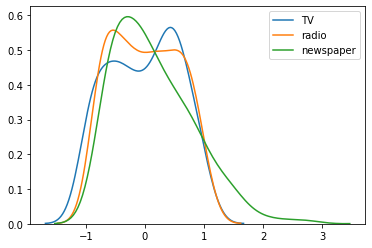

In [124]:
sns.kdeplot(rscl_data["TV"])
sns.kdeplot(rscl_data["radio"])
sns.kdeplot(rscl_data["newspaper"])
plt.show()